In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
print("--- DataFrame Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Descriptive Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6

In [4]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Missing Values in 'Age' filled with median: {median_age}")

mode_embarked = df['Embarked'].mode()[0] #mode()[0] since mode() can return multiple values with the same frequency
df['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing Values in 'Embarked' filled with mode: {mode_embarked}")

print("\n--- DataFrame Into After Imputation ---")
df.info()

Missing Values in 'Age' filled with median: 28.0
Missing Values in 'Embarked' filled with mode: S

--- DataFrame Into After Imputation ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\mdsai\AppData\Local\Temp\ipykernel_6324\1524164259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\mdsai\AppData\Local\Temp\ipykernel_6324\1524164259.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [5]:
print("--- Survival Rate by Sex ---")
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

print("\n--- Survival Rate by Pclass")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print(survival_by_pclass)

print("\n--- Survival Rate by Pclass and Sex ---")
survival_by_pclass_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(survival_by_pclass_sex)

--- Survival Rate by Sex ---
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

--- Survival Rate by Pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

--- Survival Rate by Pclass and Sex ---
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

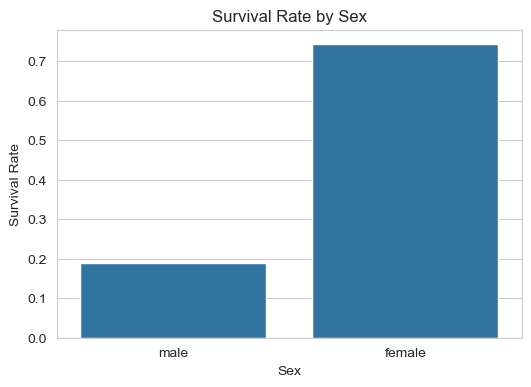

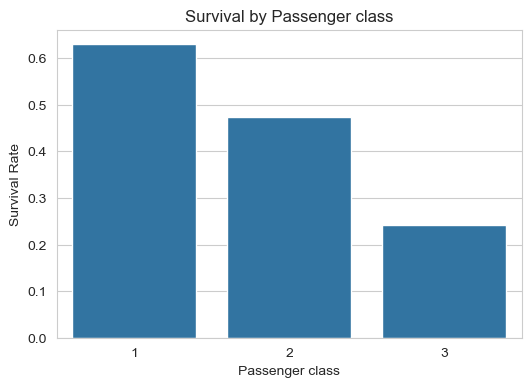

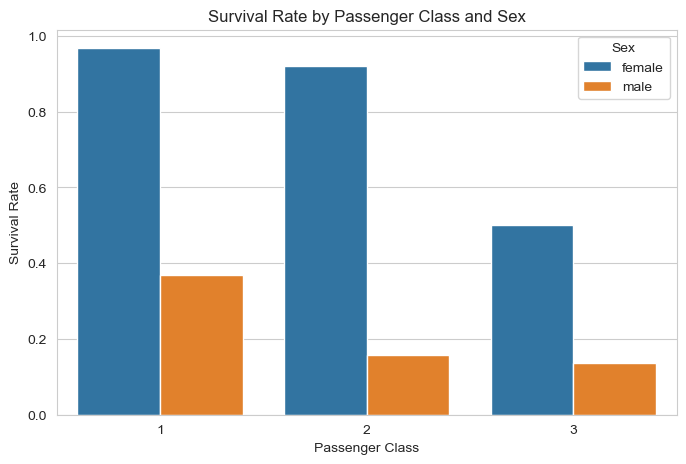

In [7]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Survival by Passenger class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger class')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class and Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Sex')
plt.show()

In [8]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 #adding 1 for the passenger themeselves

In [10]:
df['IsAlone'] = 0

In [11]:
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [12]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone  
0      0         A/5 21171   7.2500   NaN        S           2        0  
1      0          PC 17599  71.2833   C85        C           2        0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1        1  
3      0            113803  53.1000  C123        S           2        0  
4      0            373450   8.0500   NaN        S           1        1

In [13]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'FamilySize', 'IsAlone', 'Embarked']

In [14]:
model_df = df[features]

In [15]:
model_df = pd.get_dummies(model_df, columns=['Sex', 'Embarked'], drop_first=True)

In [16]:
model_df.dropna(inplace=True)

In [17]:
print('--- DataFrame with One-Hot Encoded Features (First 5 rows) ---')
print(model_df.head())

--- DataFrame with One-Hot Encoded Features (First 5 rows) ---
   Survived  Pclass   Age  FamilySize  IsAlone  Sex_male  Embarked_Q  \
0         0       3  22.0           2        0      True       False   
1         1       1  38.0           2        0     False       False   
2         1       3  26.0           1        1     False       False   
3         1       1  35.0           2        0     False       False   
4         0       3  35.0           1        1      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [18]:
print("\n--- DataFrame Info After Encoding ---")
model_df.info()


--- DataFrame Info After Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   FamilySize  891 non-null    int64  
 4   IsAlone     891 non-null    int64  
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 37.5 KB


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
X = model_df.drop('Survived', axis=1)

In [26]:
y = model_df['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8045
